In [3]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [64]:
#import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [66]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
## Divide the dataset into independent and dependent feature
X = dataset.iloc[:,3:-1]

In [68]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [69]:
y =dataset.iloc[:,13]

In [70]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [71]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [72]:
#Feature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [73]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [74]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [75]:
#concatenate these variable with dataframe
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [76]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [77]:
X=pd.concat([X,geography,gender],axis=1)

In [78]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [79]:
#Splitting the datset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [80]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [81]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [82]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [83]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [84]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
ob=StandardScaler()
X_train=ob.fit_transform(X_train)
X_test = ob.transform(X_test)

In [85]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [86]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [87]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.552043,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,1.754865,-0.573694,-1.091687
1,-1.314903,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,-0.569844,-0.573694,-1.091687
2,0.571630,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,-0.569844,1.743090,-1.091687
3,1.416961,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,-0.569844,-0.573694,0.916013
4,0.571630,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,1.754865,-0.573694,0.916013
...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.263393,-1.421650,-1.377440,-1.215717,0.809503,0.642595,0.968738,1.404319,-0.569844,-0.573694,-1.091687
1996,-0.665441,-0.368904,0.698712,-1.215717,0.809503,0.642595,-1.032270,-0.511196,-0.569844,-0.573694,-1.091687
1997,-0.747912,-0.273200,-1.377440,1.297455,0.809503,0.642595,-1.032270,0.718885,-0.569844,1.743090,0.916013
1998,-0.005670,-0.464608,-0.339364,1.059752,-0.921591,0.642595,0.968738,-1.545078,1.754865,-0.573694,0.916013


In [88]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321,-0.569844,1.743090,-1.091687


In [89]:
X_test.shape

(2000, 11)

In [90]:
X_train.shape

(8000, 11)

In [93]:
#ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [94]:
##Lets initialize the ANN
classifier=Sequential()

In [137]:
##Adding the input layer
classifier.add(Dense(units=11,activation='relu'))


In [138]:
from keras.backend import dropout
#Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))


In [139]:
#Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [140]:
#Adding the ouput layer
classifier.add(Dense(1,activation='sigmoid'))

In [141]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [142]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [143]:
print(opt)

In [144]:
model_history= classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
560/560 [==============================] - 4s 5ms/step - loss: 0.4118 - accuracy: 0.8434 - val_loss: 0.3961 - val_accuracy: 0.8479
Epoch 2/1000
560/560 [==============================] - 3s 5ms/step - loss: 0.3888 - accuracy: 0.8471 - val_loss: 0.3917 - val_accuracy: 0.8438
Epoch 3/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3850 - accuracy: 0.8448 - val_loss: 0.4029 - val_accuracy: 0.7958
Epoch 4/1000
560/560 [==============================] - 3s 5ms/step - loss: 0.3780 - accuracy: 0.8450 - val_loss: 0.3825 - val_accuracy: 0.8517
Epoch 5/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3796 - accuracy: 0.8470 - val_loss: 0.3865 - val_accuracy: 0.8483
Epoch 6/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3784 - accuracy: 0.8466 - val_loss: 0.3907 - val_accuracy: 0.8517
Epoch 7/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3601 - accuracy: 0.8614 - val_loss: 0.3677 - val_accuracy:

In [145]:
## Early stopping 
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [146]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

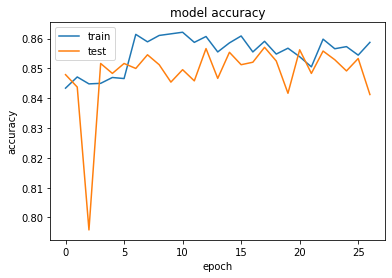

In [147]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [148]:
# Making the prediction and evaluating the model

#perdicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [149]:
#make the confusion matrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1575,   20],
       [ 280,  125]])

In [150]:
#calculate the accuracy 
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [151]:
score

0.85

In [152]:
## get the weights 
classifier.get_weights()

[array([[-0.6569801 , -0.36177275,  3.011389  , -0.5501743 , -0.43403012,
         -0.32415622,  0.1852129 , -0.01141396, -0.78208464,  4.0658693 ,
         -1.4837326 ],
        [ 0.61757356,  1.6784701 , -5.99958   , -6.395349  ,  4.52636   ,
          3.8530324 ,  4.670932  , -2.3585968 , -4.130042  , -4.6640897 ,
         -6.3357763 ],
        [-2.1581302 ,  0.54690087, -0.19554621,  0.05108213,  0.745155  ,
         -2.2260742 , -0.16985889, -0.8297124 , -0.23779598,  1.3822861 ,
          0.16948305],
        [ 3.0065308 ,  1.8602787 ,  4.642019  , -0.8483113 , -1.3259548 ,
          5.508936  , -1.5803325 , -8.528345  , -6.2792287 , -2.1800065 ,
          2.8769608 ],
        [ 6.896758  ,  7.1901927 , -0.49803907,  0.5798619 ,  0.58104205,
         -1.682343  , -7.049891  , -0.88871074, -8.880151  , -1.2186791 ,
         -1.0979781 ],
        [-0.57208765, -0.4146731 , -1.4943576 , -1.9586979 , -0.2905388 ,
          0.696945  , -1.3819953 ,  1.804988  ,  0.88074964,  1.7448148